# 1. FIND-s

In [1]:
import csv
lines=csv.reader(open("D1.csv",encoding="utf8"))

data=list()

for row in lines:
    if(row[-1]=='Y'):
        data.append(row)

numrows=len(data)
numcols=len(data[0])-1
hypothesis= ['%' for _ in range(numcols)]
print(hypothesis)

for j in range(numcols):
    hypothesis[j]=data[0][j]

for i in range(numrows):
    for j in range(numcols):
        if(hypothesis[j]!=data[i][j]):
            hypothesis[j]='?'
print(hypothesis)
        

['%', '%', '%', '%', '%']
['Japan', '?', '?', '?', 'Economy']


# 2. Candidate Elimination

In [52]:
import pandas as pd
import numpy as np
data=pd.DataFrame(pd.read_csv('D1.csv'))

features=np.array(data.iloc[:,0:-1])
target=np.array(data.iloc[:,-1])

specific=features[0].copy()
generic=[['?' for i in range(len(specific))] for i in range(len(specific))]
#print(generic)

for i,h in enumerate(features):
    if target[i]=='Y':
        for x in range(len(specific)):
            if h[x]!=specific[x]:
                specific[x]='?'
                generic[x][x]='?'
    
    elif target[i]=='N':
        for x in range(len(specific)):
            if h[x]!=specific[x]:
                generic[x][x]=specific[x]
            else:
                generic[x][x]='?'

for i in range(4):      
    generic.remove(['?','?','?','?','?'])

print(specific)
print(generic)

['Japan' '?' '?' '?' 'Economy']
[['Japan', '?', '?', '?', '?']]


# 3. ID3

In [5]:
import numpy as np
from csv import reader
from math import log2
from collections import Counter
from pprint import pprint

YES, NO = "Y", "N"


class Node:
    def __init__(self, label):
        self.label = label
        self.branches = {}


def entropy(data):
    total, positive, negative = len(
        data), (data[:, -1] == YES).sum(), (data[:, -1] == NO).sum()
    entropy = 0
    if positive:
        entropy -= positive / total * log2(positive / total)
    if negative:
        entropy -= negative / total * log2(negative / total)
    return entropy


def gain(s, data, column):
    values = set(data[:, column])
    gain = s
    for value in values:
        sub = data[data[:, column] == value]
        gain -= len(sub) / len(data) * entropy(sub)
    return gain


def bestAttribute(data):
    s = entropy(data)
    g = [gain(s, data, column) for column in range(len(data[0]) - 1)]
    return g.index(max(g))


def id3(data, labels):
    root = Node('Null')
    if entropy(data) == 0:
        root.label = data[0, -1]
    elif len(data[0]) == 1:
        root.label = Counter(data[:, -1]).most_common()[0][0]
    else:
        column = bestAttribute(data)
        root.label = labels[column]
        values = set(data[:, column])
        for value in values:
            nData = np.delete(
                data[data[:, column] == value], column, axis=1)
            nLabels = np.delete(labels, column)
            root.branches[value] = id3(nData, nLabels)
    return root


def getRules(root, rule, rules):
    if not root.branches:
        rules.append(rule[:-2] + "=> " + root.label)
    for value, nRoot in root.branches.items():
        getRules(nRoot, rule + root.label + "=" + value + " ^ ", rules)


def predict(tree, tup):
    if not tree.branches:
        return tree.label
    return predict(tree.branches[tup[tree.label]], tup)


labels = np.array(['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis'])

with open('3-dataset.csv') as f:
    data = np.array(list(reader(f)))

tree = id3(data, labels)
rules = []
getRules(tree, "", rules)
pprint(sorted(rules))

tup = {}
for label in labels[:-1]:
    tup[label] = input(label + ": ")

print(predict(tree, tup))

['Outlook=Overcast => Y',
 'Outlook=Rain ^ Wind=F => Y',
 'Outlook=Rain ^ Wind=T => N',
 'Outlook=Sunny ^ Humidity=High => N',
 'Outlook=Sunny ^ Humidity=Normal => Y']
Outlook: Rain
Temperature: Cold
Humidity: High
Wind: F
Y


# 4. Backpropogation

In [47]:
import numpy as np
import csv

lines = csv.reader(open('Dataset4.csv'))
x=list()
y=list()
for r in lines:
    x.append([float(r[0]),float(r[1])])
    y.append([float(r[2])])
x=np.array(x)
y=np.array(y)

def derivative(x):
    return x*(1-x)
def sigmoid(x):
    return 1/(1+np.exp(-x))
lr=0.6
on=1 #output neurons
iln=2 #input layer neurons
hln=3 #hidden layer neurons

wh=np.random.uniform(size=(iln,hln)) #weight hidden
bh=np.random.uniform(size=(1,hln)) #bias hidden
wo=np.random.uniform(size=(hln,on)) #weight output
bo=np.random.uniform(size=(1,on)) #bias output

for i in range(7000):
#forward propagation
    net_h=np.dot(x,wh)+bh
    sigma_h=sigmoid(net_h)
    net_o=np.dot(sigma_h,wo)+bo
    output=sigmoid(net_o)
#backward propagation
    deltaK=(y-output)*derivative(output)
    deltaH=np.dot(deltaK,wo.T)*derivative(sigma_h)
    wo+=np.dot(sigma_h.T,deltaK)*lr
    wh+=np.dot(x.T,deltaH)*lr
   
   
print("input",str(x))
print("real output",str(y))
print("predicted output",output)

input [[ 2.7810836   2.550537  ]
 [ 1.46548937  2.36212508]
 [ 3.39656169  4.40029353]
 [ 1.38807019  1.85022032]
 [ 3.06407232  3.00530597]
 [ 7.62753121  2.75926224]
 [ 5.33244125  2.08862677]
 [ 6.92259672  1.77106367]
 [ 8.67541865 -0.24206865]
 [ 7.67375647  3.50856301]]
real output [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
predicted output [[0.00732523]
 [0.00335737]
 [0.00292378]
 [0.00533202]
 [0.00458827]
 [0.99567861]
 [0.9937811 ]
 [0.99592774]
 [0.99600551]
 [0.99364218]]


# 5. Naive Bayes Classifier

In [12]:
from csv import reader
from pprint import pprint
from random import shuffle, seed
from math import exp, pi, sqrt
from operator import itemgetter
import numpy as np

seed(2)
data = np.array(list(reader(open('5-dataset-alt.csv'))), dtype='float')
shuffle(data)
trainLen = int(.9 * len(data))
trainData, trainTarget = data[:trainLen, : -1], data[:trainLen, -1]
testData, testTarget = data[trainLen:, : -1], data[trainLen:, -1]


def safe_div(x, y):
    return x / y if y != 0 else 0


def getProbabilty(x, mean, std):
    exponent = exp(-safe_div((x - mean) ** 2, 2 * std ** 2))
    return safe_div(1, sqrt(2 * pi) * std) * exponent


classes = {}
for attrs, target in zip(trainData, trainTarget):
    if target not in classes:
        classes[target] = []
    classes[target].append(attrs)

summaries = {}
for cls in classes.keys():
    summaries[cls] = []
    for column in zip(*classes[cls]):
        summaries[cls].append((np.mean(column), np.std(column)))

correct = 0
for attrs, target in zip(testData, testTarget):
    probabilty = {}
    for cls in classes.keys():
        probabilty[cls] = 1
        for i, (mean, std) in enumerate(summaries[cls]):
            probabilty[cls] *= getProbabilty(attrs[i], mean, std)

    cls = sorted(probabilty.items(), key=itemgetter(1), reverse=True)[0][0]
    print('Actual:', target,'  Predicted: ',cls)
    if cls == target:
        correct += 1

print('Accuracy  ', correct/len(testData))

Actual: 10.0   Predicted:  10.0
Actual: 5.0   Predicted:  5.0
Actual: 10.0   Predicted:  5.0
Actual: 10.0   Predicted:  10.0
Actual: 10.0   Predicted:  10.0
Actual: 0.0   Predicted:  0.0
Actual: 0.0   Predicted:  0.0
Actual: 5.0   Predicted:  5.0
Actual: 5.0   Predicted:  5.0
Actual: 5.0   Predicted:  5.0
Actual: 0.0   Predicted:  0.0
Actual: 5.0   Predicted:  5.0
Actual: 0.0   Predicted:  0.0
Actual: 0.0   Predicted:  0.0
Actual: 0.0   Predicted:  0.0
Accuracy   0.9333333333333333


In [53]:
import csv,random
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris=load_iris()
train_data,test_data,train_target,test_target=train_test_split(iris.data,iris.target,test_size=0.25)

gnb = GaussianNB()
gnb.fit(train_data,train_target)

p = gnb.predict(test_data)
print(test_target)
print(p)

print(accuracy_score(test_target,p))

[1 1 2 2 1 2 1 2 0 2 2 1 0 2 2 0 1 2 2 2 1 1 2 1 2 1 0 2 1 0 0 0 1 0 0 1 1
 1]
[1 1 2 2 1 2 1 2 0 2 2 1 0 1 2 0 1 2 1 2 1 1 2 1 2 1 0 2 1 0 0 0 1 0 0 2 1
 1]
0.9210526315789473


# 6. Naive Bayes Doc

In [13]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

c, t = CountVectorizer(), TfidfTransformer()

trainTr = t.fit_transform(c.fit_transform(train.data))
testTr = t.transform(c.transform(test.data))

#print('training dataset:\n',trainTr[0])

model = MultinomialNB()
model.fit(trainTr, train.target)
predicted = model.predict(testTr)

print('Accuracy : ', accuracy_score(test.target, predicted), sep='\n')
print('Classification Report : ', classification_report(
    test.target, predicted, target_names=test.target_names), sep='\n')
print('Confusion Matrix : ', confusion_matrix(test.target, predicted), sep='\n')

Accuracy : 
0.8348868175765646
Classification Report : 
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

             micro avg       0.83      0.83      0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502

Confusion Matrix : 
[[192   2   6 119]
 [  2 347   4  36]
 [  2  11 322  61]
 [  2   2   1 393]]


# 7. Bayesian Network

In [5]:
import bayespy as bp
import numpy as np
import csv

import warnings
warnings.filterwarnings("ignore")

a = {'SuperSeniorCitizen':0, 'SeniorCitizen':1, 'MiddleAged':2, 'Youth':3,'Teen':4}
b = {'Male':0, 'Female':1}
c = {'Yes':0, 'No':1}
d = {'High':0, 'Medium':1, 'Low':2}
e = {'Athlete':0, 'Active':1, 'Moderate':2, 'Sedetary':3}
f = {'High':0, 'BorderLine':1, 'Normal':2}
g = {'Yes':0, 'No':1}

dataset = list(csv.reader(open('Dataset7.csv')))

data = [ [ a[x[0]],b[x[1]],c[x[2]],d[x[3]],e[x[4]],f[x[5]],g[x[6]] ] for x in dataset]

data = np.array(data)

n = len(dataset)
attr = [5,2,2,3,4,3]
arr = ['?' for _ in range(6)]

for i in range(6):
    x = bp.nodes.Dirichlet(1.0*np.ones(attr[i]))
    arr[i] = bp.nodes.Categorical(x , plates=(n,))
    arr[i].observe(data[:,i])

x = bp.nodes.Dirichlet(np.ones(2), plates=(5, 2, 2, 3, 4, 3))
hd = bp.nodes.MultiMixture( arr , bp.nodes.Categorical, x)
hd.observe(data[:,6])

query = [int(input()) for i in range(6)]

res = bp.nodes.MultiMixture(query, bp.nodes.Categorical, x).get_moments()[0][0]
print("Probability(HeartDisease) = " ,res)



2
1
1
0
1
1
Probability(HeartDisease) =  0.5


# 8. Kmeans

0.5528190123564091
0.5011761635067201


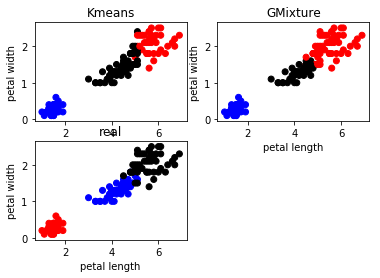

In [38]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import pylab as plt

iris=load_iris()
x,y=iris.data,iris.target

k=KMeans(n_clusters=3)
k.fit(x)
kk=k.predict(x)

gm=GaussianMixture(n_components=3)
gm.fit(x)
gk=gm.predict(x)

print(silhouette_score(x,kk))
print(silhouette_score(x,gk))

#plotting
colormap=np.array(['red','blue','black'])

def plot(i,target,title):
    plt.subplot(2,2,i)
    plt.scatter(x[:,2],x[:,3],c=colormap[target])
    plt.title(title)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    
plot(1,kk,'Kmeans')
plot(2,gk,'GMixture')
plot(3,y,'real')

plt.show()

# 9. KNN

In [21]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris=load_iris()
X_train,X_test,Y_train,Y_test=train_test_split(iris.data,iris.target,test_size=.25)

clf=KNeighborsClassifier()
clf.fit(X_train,Y_train)

print("Accuracy:",clf.score(X_test,Y_test))

print('Test data:')
print(Y_test)
print('Predicted data:')
print(clf.predict(X_test))

Accuracy: 0.9210526315789473
Test data:
[1 0 2 0 1 1 2 0 0 1 1 1 2 1 0 2 1 2 0 0 0 0 1 2 2 2 2 0 0 0 2 2 1 2 0 0 1
 2]
Predicted data:
[1 0 2 0 1 1 2 0 0 1 1 1 1 1 0 2 1 1 0 0 0 0 1 2 2 2 2 0 0 0 2 1 1 2 0 0 1
 2]


# 10. Locally Weighted regression

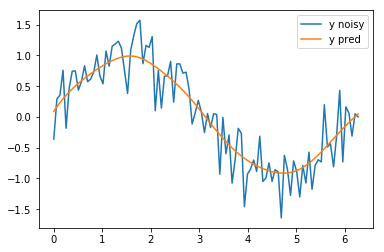

In [30]:
import numpy as np
import pylab as pl
from scipy import linalg

def lowess(x,y):
    n=len(x)
    yest=np.zeros(n)
    w=np.array([np.exp( -((x-x[i])**2)/(2*0.4*0.4)) for i in range(n)])
    for i in range(n):
        weights=w[:,i]
        b=np.array([np.sum(weights*y),np.sum(weights*y*x)])
        A=np.array([[np.sum(weights),np.sum(weights*x)],[np.sum(weights*x),np.sum(weights*x*x)]])
        theta=linalg.solve(A,b)
        yest[i]=theta[0]+theta[1]*x[i]
    return yest
    
    
    
    
x=np.linspace(0,2*3.14,100)
y=np.sin(x)+0.3*np.random.randn(100)

yest=lowess(x,y)

pl.clf()
pl.plot(x,y,label='y noisy')
pl.plot(x,yest,label='y pred')
pl.legend()
pl.show()